<h1><center><strong>Exploratory Data Analysis (MVP version 1)</strong></center></h1>

# First import all  libraries that we need , before start working 
<hr style='color: #193498'></hr>

In [4]:
# Import the laibarary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Step1: Exploring the data
<hr style='color: #193498'></hr>

In [5]:
#  Read the data
df = pd.read_csv('cardio_train.csv', sep=';')
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [6]:
# see the table detailes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,70000.0,49972.419900,28851.302323,0.0,25006.75,50001.5,74889.25,99999.0
age,70000.0,19468.865814,2467.251667,10798.0,17664.00,19703.0,21327.00,23713.0
gender,70000.0,1.349571,0.476838,1.0,1.00,1.0,2.00,2.0
height,70000.0,164.359229,8.210126,55.0,159.00,165.0,170.00,250.0
weight,70000.0,74.205690,14.395757,10.0,65.00,72.0,82.00,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.00,120.0,140.00,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.00,80.0,90.00,11000.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.00,1.0,2.00,3.0
gluc,70000.0,1.226457,0.572270,1.0,1.00,1.0,1.00,3.0
smoke,70000.0,0.088129,0.283484,0.0,0.00,0.0,0.00,1.0


>Looking at the above information:

- ID need to be dropped
- Age provided is in days. We will leave it as it is
- Gender provided in binary .we will convert it to string
- ap_hi and ap_lo has negative numbers and their name is not clear. This need to be fixed

# Step2: Clean the data 
<hr style='color: #193498'></hr>

### 1-Change the column name to make it clear 
<hr style='color: #A9333A'></hr>

In [8]:
# ap_hi[Systolic_blood_pressure ]	ap_lo[Diastolic blood pressure ]	cholesterol	gluc[[Glucose]]	smoke	alco	active[Physical activity]	cardio [cardiovascular ]

df.rename(columns={'ap_hi': 'SB_pressure' , 'ap_lo' : 'DB_pressure' , 'active':'P_activity'} ,inplace='True')
df

,id,age,gender,height,weight,SB_pressure,DB_pressure,cholesterol,gluc,smoke,alco,P_activity,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


### 2-Replace the gender veiw :  number 1 with male & number 2 with female
<hr style='color: #A9333A'></hr>

In [9]:
gender_dic= { 1: 'Male', 2: 'Female'}
df['gender']=df.gender.map(gender_dic)
df

,id,age,gender,height,weight,SB_pressure,DB_pressure,cholesterol,gluc,smoke,alco,P_activity,cardio
0,0,18393,Female,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,Male,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,Male,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,Female,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,Male,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,Female,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,Male,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,Female,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,Male,163,72.0,135,80,1,2,0,0,0,1


### 3-Change the age type from **days** to age by **years**
<hr style='color: #A9333A'></hr>

In [10]:
df['age'] = df['age'] // 365
df

,id,age,gender,height,weight,SB_pressure,DB_pressure,cholesterol,gluc,smoke,alco,P_activity,cardio
0,0,50,Female,168,62.0,110,80,1,1,0,0,1,0
1,1,55,Male,156,85.0,140,90,3,1,0,0,1,1
2,2,51,Male,165,64.0,130,70,3,1,0,0,0,1
3,3,48,Female,169,82.0,150,100,1,1,0,0,1,1
4,4,47,Male,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,52,Female,168,76.0,120,80,1,1,1,0,1,0
69996,99995,61,Male,158,126.0,140,90,2,2,0,0,1,1
69997,99996,52,Female,183,105.0,180,90,3,1,0,1,0,1
69998,99998,61,Male,163,72.0,135,80,1,2,0,0,0,1


### 4- Outlier Treatment
<hr style='color: #A9333A'></hr>


In [11]:
df.head()

,id,age,gender,height,weight,SB_pressure,DB_pressure,cholesterol,gluc,smoke,alco,P_activity,cardio
0,0,50,Female,168,62.0,110,80,1,1,0,0,1,0
1,1,55,Male,156,85.0,140,90,3,1,0,0,1,1
2,2,51,Male,165,64.0,130,70,3,1,0,0,0,1
3,3,48,Female,169,82.0,150,100,1,1,0,0,1,1
4,4,47,Male,156,56.0,100,60,1,1,0,0,0,0


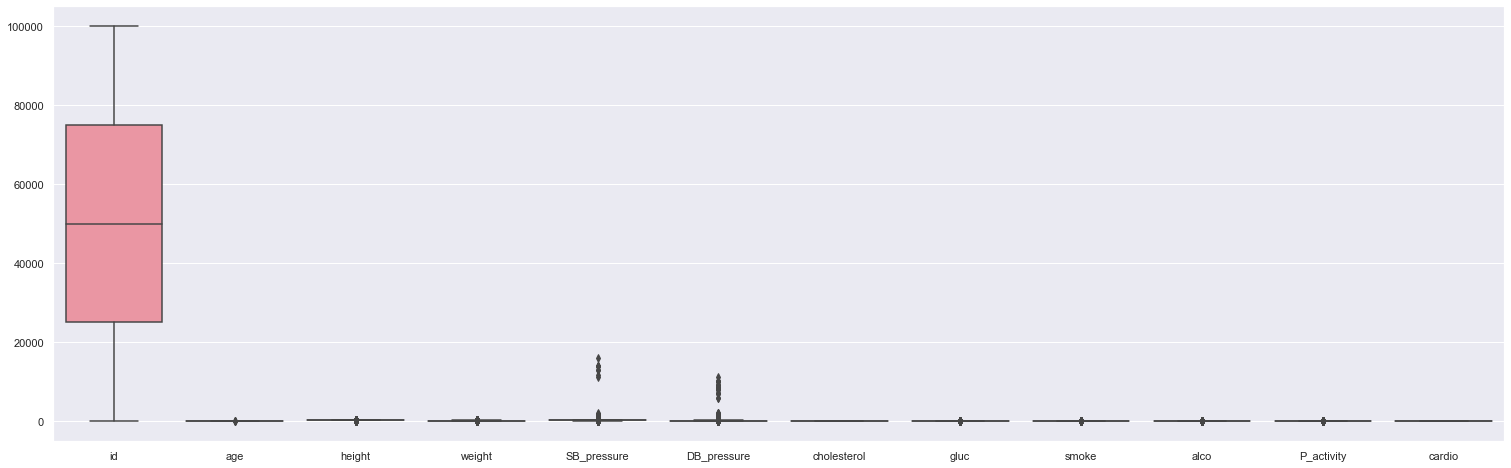

In [12]:

# this function is a shortcut to set the figure to specific size with seaborn.
def set_fig_size(size=(15,8)):
    sns.set(rc = {'figure.figsize':size})

# this function is a shortcut to show boxplot with specific size with seaborn.
def show_boxplot(data, size=(26,8)):
    set_fig_size(size)
    sns.boxplot(data=df)
    

show_boxplot(df)

In [13]:
# We will drop the SB above 400 as highest SB recorded is 370/360. 
df[(df.SB_pressure>=370) | (df.DB_pressure>=370)]

,id,age,gender,height,weight,SB_pressure,DB_pressure,cholesterol,gluc,smoke,alco,P_activity,cardio
228,314,47,Female,183,98.0,160,1100,1,2,1,0,1,1
241,334,60,Female,157,60.0,160,1000,2,1,0,0,0,1
260,357,49,Male,150,83.0,140,800,1,1,0,0,1,1
329,458,64,Male,176,63.0,160,1000,2,2,0,0,0,1
345,482,51,Male,154,81.0,140,1000,2,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69771,99659,63,Male,167,81.0,160,1000,1,1,0,0,1,1
69872,99798,59,Male,152,56.0,160,1000,1,1,0,0,1,1
69878,99807,58,Female,168,95.0,160,1000,1,1,0,0,1,1
69885,99816,61,Female,166,78.0,170,1000,1,1,0,0,0,0


In [14]:
# drop any row that have more than 370
df=df[~(df.SB_pressure>370) ] 

In [15]:
# drop any row that have more than 370
df=df[~(df.DB_pressure>370) ] 

In [16]:
df.describe()

,id,age,height,weight,SB_pressure,DB_pressure,cholesterol,gluc,smoke,alco,P_activity,cardio
count,69008.000000,69008.00000,69008.000000,69008.000000,69008.000000,69008.000000,69008.000000,69008.000000,69008.000000,69008.000000,69008.000000,69008.000000
mean,49967.635347,52.82673,164.359567,74.117428,126.298473,81.330324,1.364364,1.225829,0.087859,0.053588,0.803284,0.494870
std,28846.614034,6.76999,8.203921,14.328664,17.900494,9.894141,0.678673,0.571781,0.283092,0.225204,0.397519,0.499977
min,0.000000,29.00000,55.000000,11.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,24996.750000,48.00000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50006.500000,53.00000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74860.250000,58.00000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,64.00000,250.000000,200.000000,309.000000,190.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
# Check how many data less than 0
df[(df.SB_pressure>0)| (df.DB_pressure>0)]

,id,age,gender,height,weight,SB_pressure,DB_pressure,cholesterol,gluc,smoke,alco,P_activity,cardio
0,0,50,Female,168,62.0,110,80,1,1,0,0,1,0
1,1,55,Male,156,85.0,140,90,3,1,0,0,1,1
2,2,51,Male,165,64.0,130,70,3,1,0,0,0,1
3,3,48,Female,169,82.0,150,100,1,1,0,0,1,1
4,4,47,Male,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,52,Female,168,76.0,120,80,1,1,1,0,1,0
69996,99995,61,Male,158,126.0,140,90,2,2,0,0,1,1
69997,99996,52,Female,183,105.0,180,90,3,1,0,1,0,1
69998,99998,61,Male,163,72.0,135,80,1,2,0,0,0,1


In [18]:
# Drop the record with SB_pressure <0 as clearly the data looks to be wrong

df=df[~(df.SB_pressure<0)]

In [19]:
# Drop the record with DB_pressure <0 as clearly the data looks to be wrong
df=df[~(df.DB_pressure<0)]

In [20]:
df.describe()

,id,age,height,weight,SB_pressure,DB_pressure,cholesterol,gluc,smoke,alco,P_activity,cardio
count,69000.000000,69000.000000,69000.000000,69000.000000,69000.000000,69000.000000,69000.000000,69000.000000,69000.000000,69000.000000,69000.000000,69000.000000
mean,49968.624623,52.826754,164.359725,74.118225,126.325145,81.332797,1.364377,1.225855,0.087870,0.053594,0.803290,0.494870
std,28847.018117,6.769551,8.204221,14.328629,17.721845,9.877680,0.678695,0.571809,0.283107,0.225217,0.397514,0.499977
min,0.000000,29.000000,55.000000,11.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,24996.750000,48.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50007.500000,53.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74861.250000,58.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,64.000000,250.000000,200.000000,309.000000,190.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
# Drop any SB_pressure that less than DB_pressure as clearly the data looks to be wrong
df[(df.SB_pressure<df.DB_pressure)]

,id,age,gender,height,weight,SB_pressure,DB_pressure,cholesterol,gluc,smoke,alco,P_activity,cardio
474,681,52,Male,156,65.0,120,150,2,1,0,0,1,0
567,815,58,Male,168,78.0,14,90,2,1,0,0,1,1
636,913,56,Female,169,68.0,70,110,1,1,0,0,1,0
927,1294,59,Female,175,70.0,14,90,3,1,0,0,1,1
979,1360,49,Male,172,65.0,11,80,1,3,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68630,98039,58,Male,160,59.0,12,80,1,1,0,0,1,0
68742,98213,51,Male,158,74.0,14,90,1,1,0,0,1,1
68998,98568,52,Male,154,77.0,14,90,1,1,0,0,1,0
69137,98743,42,Female,176,65.0,12,80,1,1,0,0,1,0


In [22]:
df.shape

(69000, 13)

In [23]:

# Merge Weight and Height into 1 feature: BMI

df['BMI']=round(df['weight']/((df['height']/100)**2),2)

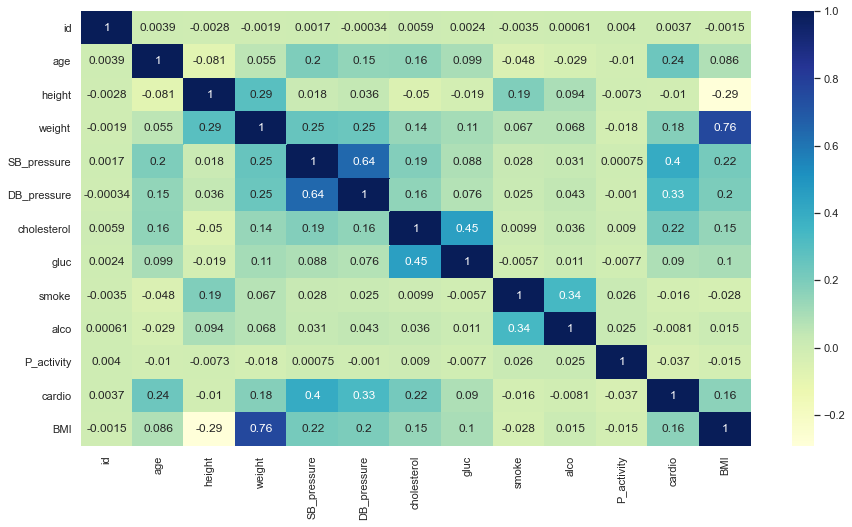

In [24]:
#  checking the correlation
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')
plt.show()

# Step3:  Answering the quistions 
<hr style='color: #193498'></hr>

### 1-What is the most gender is exposed to be Cardiovascular Disease  ? 
<hr style='color: #A9333A'></hr>

<AxesSubplot:title={'center':'Distribution of Genders (Male, Female)'}, xlabel='Gender', ylabel='Number of Occurences'>

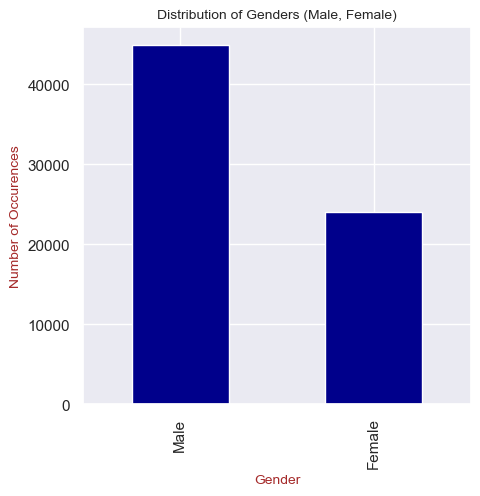

In [52]:
# Gender Distribution
fig, ax = plt.subplots(figsize = (5,5), dpi=100)
ax.set_title('Distribution of Genders (Male, Female)', fontsize = 10 )
ax.set_xlabel("Gender", fontsize = 10 ,color="#A52A2A")
ax.set_ylabel("Number of Occurences", fontsize = 10 , color="#A52A2A")
df["gender"].value_counts().plot(ax = ax, kind = "bar", color = "darkblue")
# fig = px.bar(df, x="gender", y="cardio", pattern_shape="cardio")
# fig.show()


In [26]:
# This step to take all the 1's in cardio column, in each gender , and sum them all together
m_gender= df.groupby(['gender'], as_index=False)[['cardio']].sum()
m_gender

,gender,cardio
0,Female,12031
1,Male,22115


In [28]:
#  Draw thejust the affected geder
fig = px.pie(m_gender, values='cardio', names='gender' , title="Distribution of Genders")
fig.show()

### 2-Is there a relationship between smoking and getting Cardiovascular Disease?
<hr style='color: #A9333A'></hr>

In [29]:
# # We will count all the injures either they smoke or not to see if smoking affect your heart health or not so we will use group by 
smoke_cardio = df.groupby(['smoke' , 'cardio'])[['cardio']].count()
smoke_cardio

cardio
smoke cardio        
0     0        31632
      1        31305
1     0         3222
      1         2841

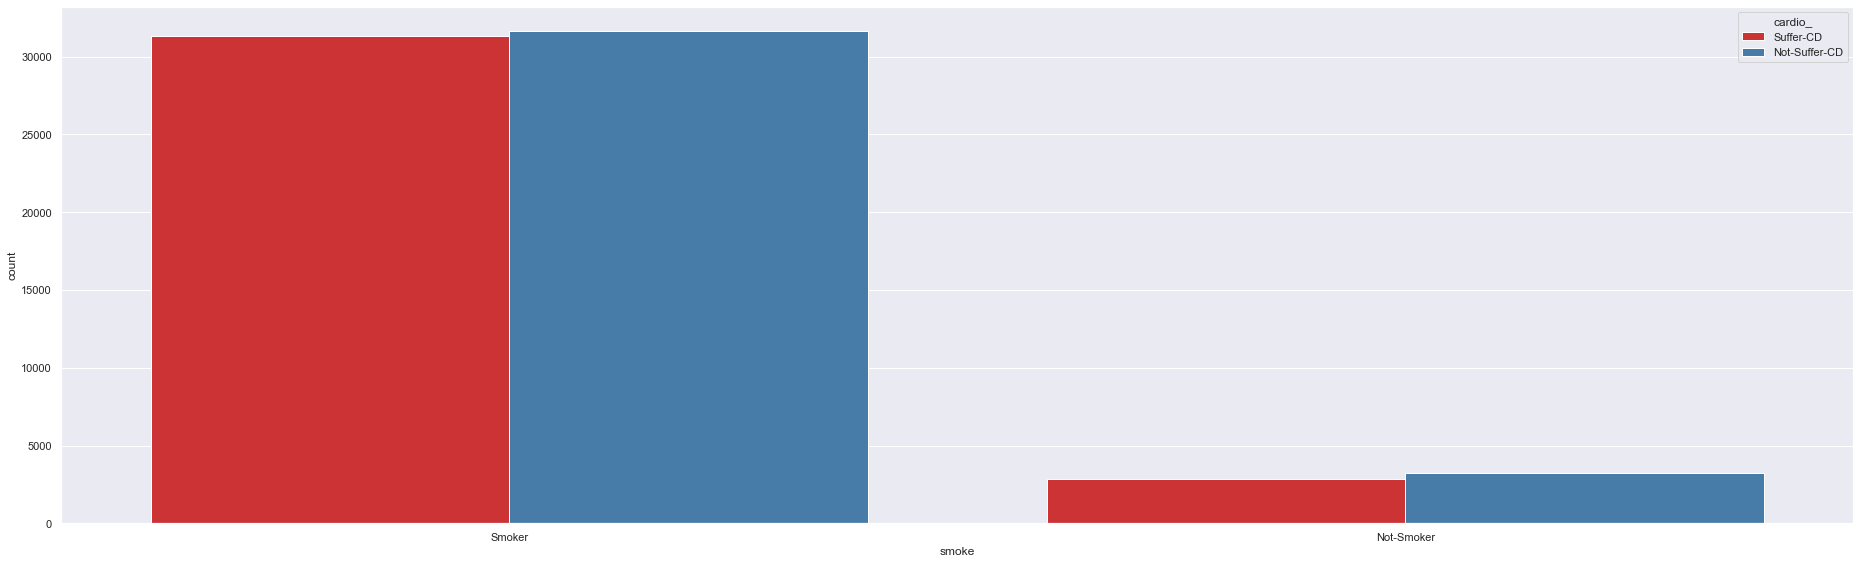

In [30]:
#  before draw I will change the hue order becouse i want the red color for the injures and so on...
Ckeys = {1:'Suffer-CD' , 0: 'Not-Suffer-CD'}
df['cardio_'] = df['cardio'].replace(Ckeys)

# Dict to replace the 0 & 1 with text
Skeys = { 1: 'Not-Smoker', 0:'Smoker'}
df['smoke'] = df['smoke'].replace(Skeys)

# Draw using seaborn with countplot
sns.set_theme(style="darkgrid")
sns.countplot(x= "smoke" , hue= "cardio_",  hue_order=['Suffer-CD','Not-Suffer-CD'],data= df , palette="Set1" );
plt.tight_layout()
plt.show()

### 3-Is there a relationship between age and getting Cardiovascular Disease?
<hr style='color: #A9333A'></hr>

In [31]:
# groupby:  age and cardio and count how many injures people and not injure in each age
ages= df.groupby(['age' , 'cardio'])[['cardio']].count()
ages

cardio
age cardio        
29  0            3
30  0            1
39  0         1343
    1          421
40  0         1274
    1          337
41  0         1329
    1          548
42  0          992
    1          416
43  0         1282
    1          720
44  0          967
    1          528
45  0         1230
    1          832
46  0          982
    1          624
47  0         1135
    1         1033
48  0          981
    1          809
49  0         1960
    1         1411
50  0         1962
    1         1215
51  0         1766
    1         1546
52  0         1752
    1         1479
53  0         1911
    1         1898
54  0         1847
    1         1716
55  0         1749
    1         2117
56  0         1667
    1         1886
57  0         1577
    1         2040
58  0         1504
    1         1847
59  0         1369
    1         2156
60  0         1326
    1         1843
61  0          865
    1         1809
62  0          716
    1         1448
63  0          739
    1         1947
64  0          625
    1         1520

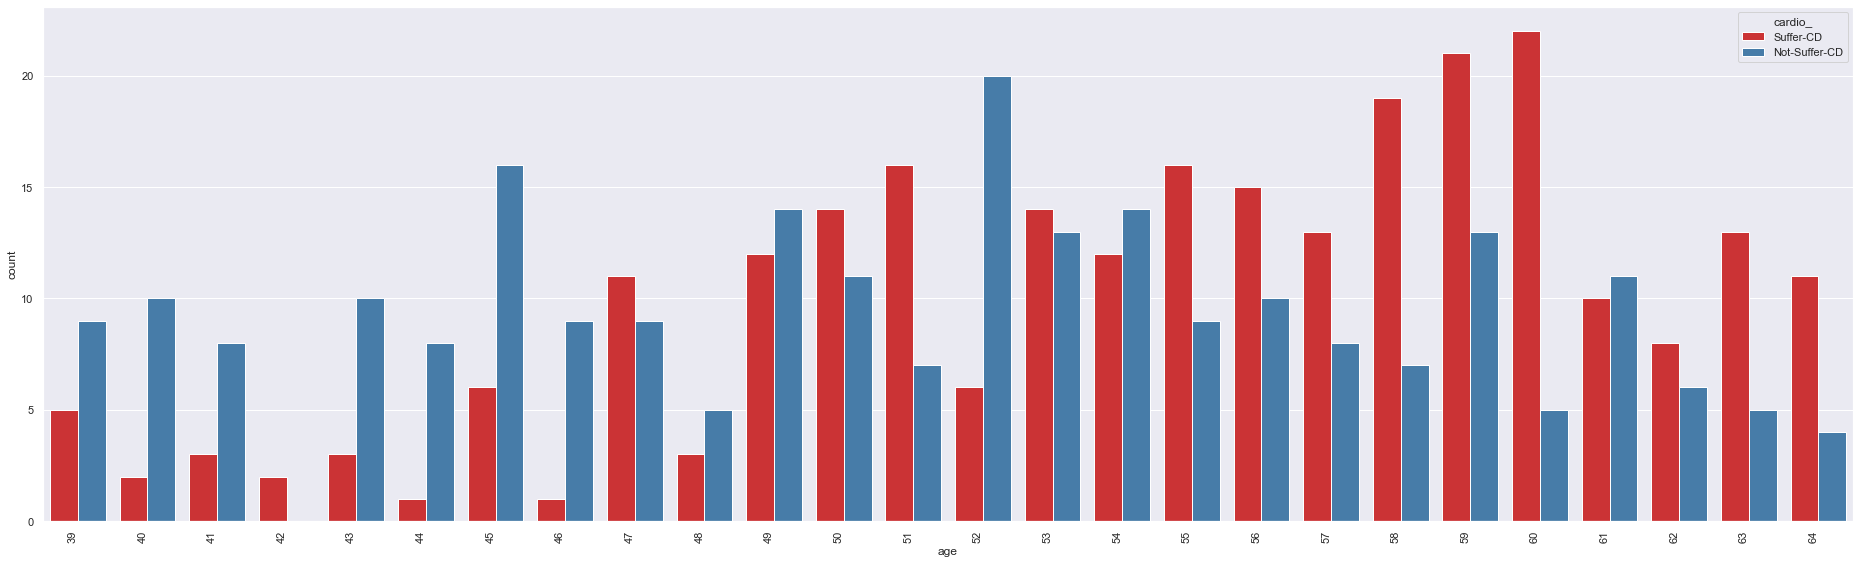

In [32]:
# Draw with seaborn
ax = sns.countplot(x= "age" , hue= "cardio_" ,hue_order=['Suffer-CD','Not-Suffer-CD'], data= df.head(500) , palette="Set1" );
ax.set_xticklabels(ax.get_xticklabels(), rotation= 90, ha="right");
plt.tight_layout()


### 4-what is the age that has the most patient number of Cardiovascular Disease?
<hr style='color: #A9333A'></hr>

In [33]:
# Find the age that have the high number of injuries
most = df.groupby(['age'] )[['cardio']].sum().sort_values(ascending = False , by ='cardio')
# if u need to call by column add -> as_index = false
most

,cardio
age,
59,2156
55,2117
57,2040
63,1947
53,1898
56,1886
58,1847
60,1843
61,1809


In [34]:
# Bring the highest 5 ages with the highest number of injuries
most1= most.head()
most1= most1.reset_index()
most1

,age,cardio
0,59,2156
1,55,2117
2,57,2040
3,63,1947
4,53,1898


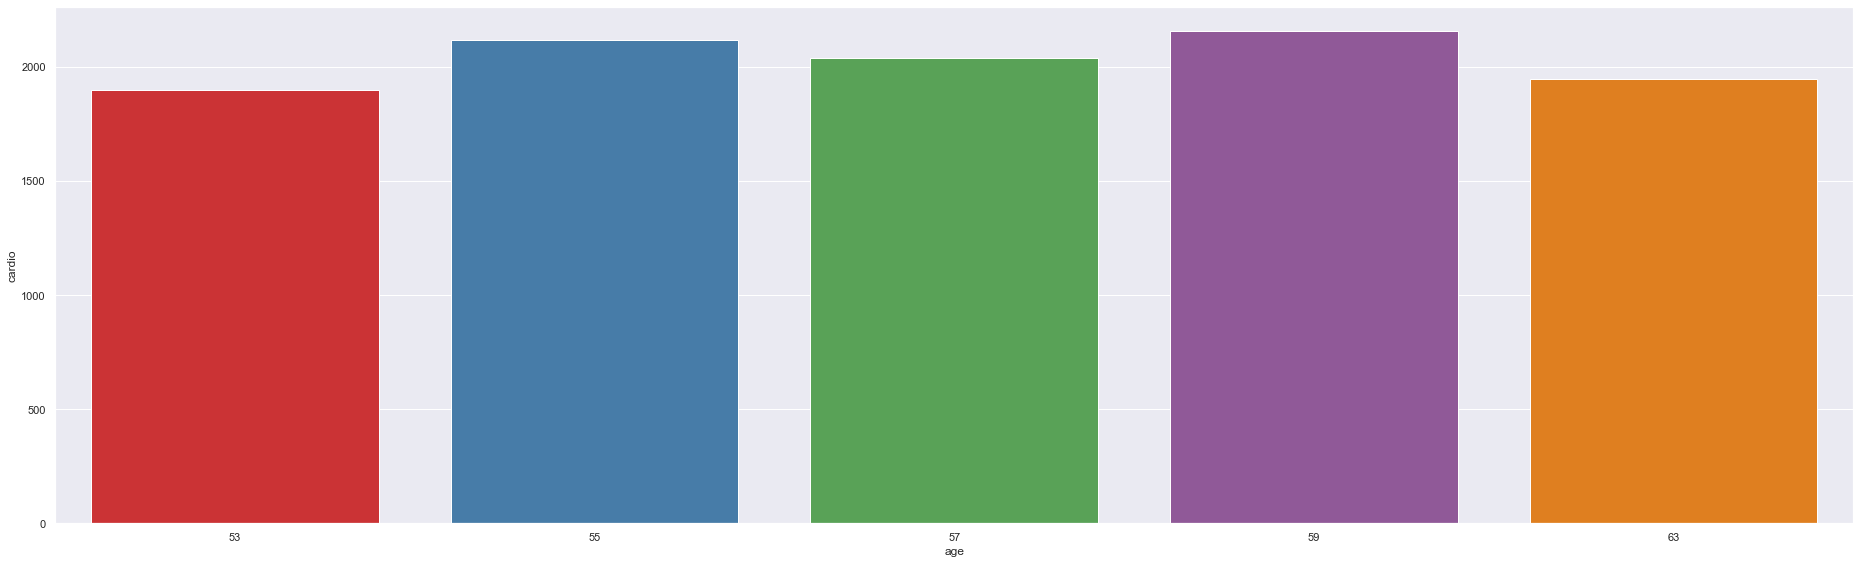

In [35]:
# Draw with seaborn and use the variable that stored the 5 highest ages just
sns.set_theme(style="darkgrid")
ax = sns.barplot( x= 'age' , y='cardio',data= most1 , palette="Set1" );
# ax.set_xticklabels(ax.get_xticklabels(), rotation= 90, ha="right");
plt.tight_layout()
plt.show()

### 5-Is their a relationship between doing physical activity and not having a Cardiovascular Disease?
<hr style='color: #A9333A'></hr>

In [36]:
# Count how many injuries in each section( they do phiscal_act = 1 ,  they don't do phiscal_act = 0)
ages= df.groupby(['P_activity' , 'cardio'])[['cardio']].count()
ages

cardio
P_activity cardio        
0          0         6345
           1         7228
1          0        28509
           1        26918

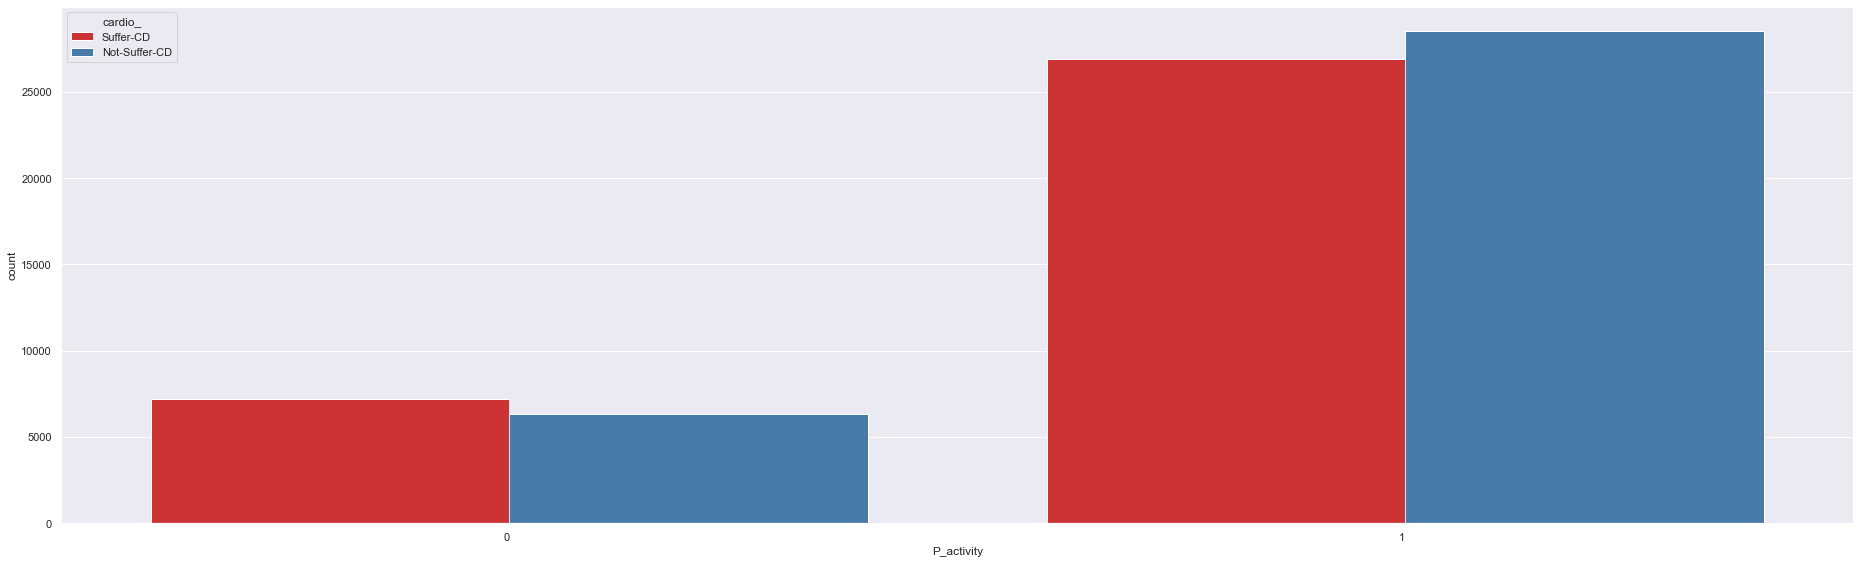

In [37]:
# Now let's see it visually
sns.set_theme(style="darkgrid")
ax = sns.countplot(x= "P_activity" , hue= "cardio_" ,hue_order=['Suffer-CD','Not-Suffer-CD'], data= df , palette="Set1" );
ax.set_xticklabels(ax.get_xticklabels(), ha="right");
plt.tight_layout()
plt.show()

### 6-Is there a relationship between being overweight and having Cardiovascular Disease?
<hr style='color: #A9333A'></hr>

In [38]:
# Take all weight that have CD = 1 (injuries)
most = df.groupby(['weight'])[['cardio']].sum()
most2= most
most2= most2.reset_index()
most2


,weight,cardio
0,11.0,1
1,21.0,1
2,22.0,0
3,23.0,0
4,28.0,0
...,...,...
276,177.0,1
277,178.0,1
278,180.0,4
279,183.0,1


> 7- What is the dangerous weight that if you reach it you will cause yourself a Cardiovascular Disease?


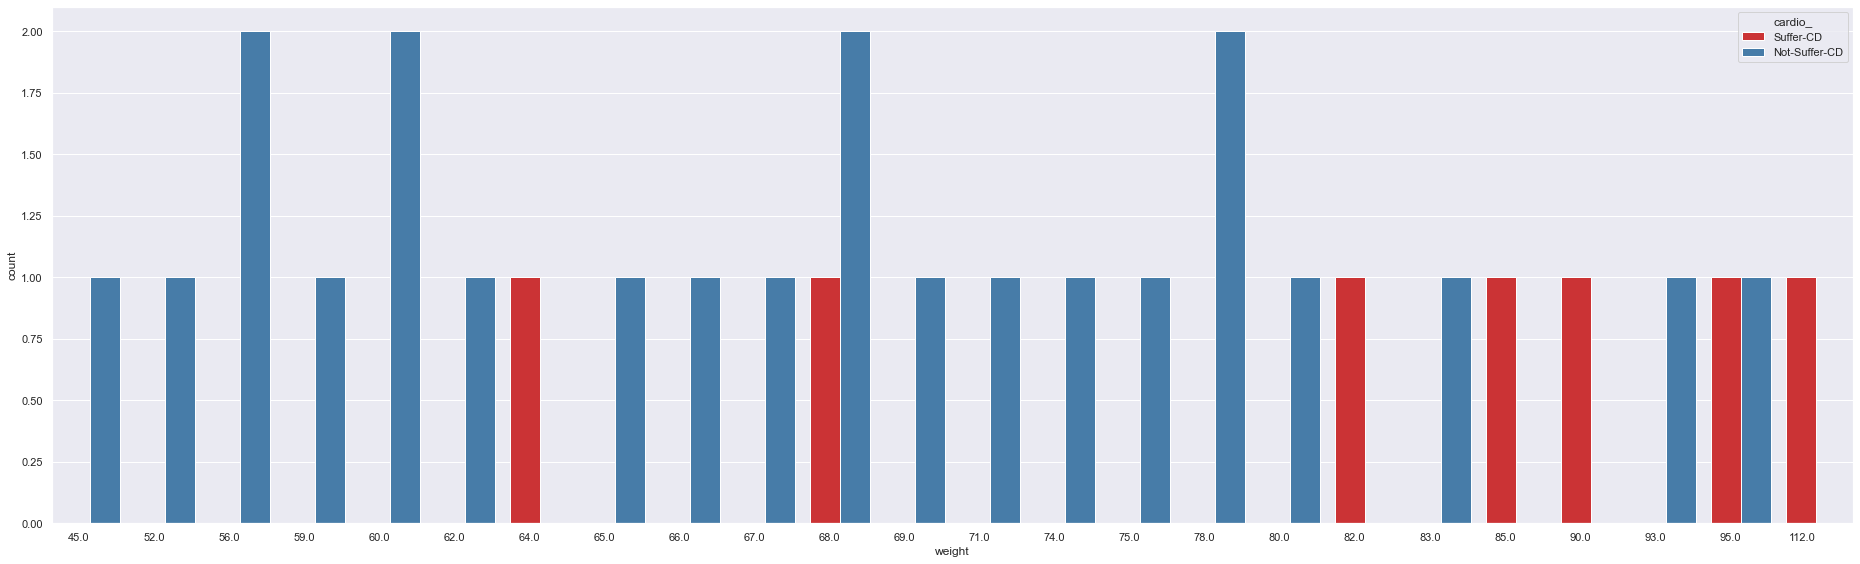

In [39]:

sns.set_theme(style="darkgrid")
ax = sns.countplot(x= "weight",hue= "cardio_" ,hue_order=['Suffer-CD','Not-Suffer-CD'] ,data= df.head(30) , palette="Set1" )
ax.set_xticklabels(ax.get_xticklabels(), ha="right");
plt.tight_layout()
plt.show()


### 8-How many cholesterol patients have a Cardiovascular ?
<hr style='color: #A9333A'></hr>

In [40]:
# Count how many patient in each level

cholesterol_filter = df.groupby(['cholesterol'] ,as_index=False)[['cardio']].sum().sort_values(ascending = False , by ='cardio')
cholesterol_filter

,cholesterol,cardio
0,1,22547
2,3,6027
1,2,5572


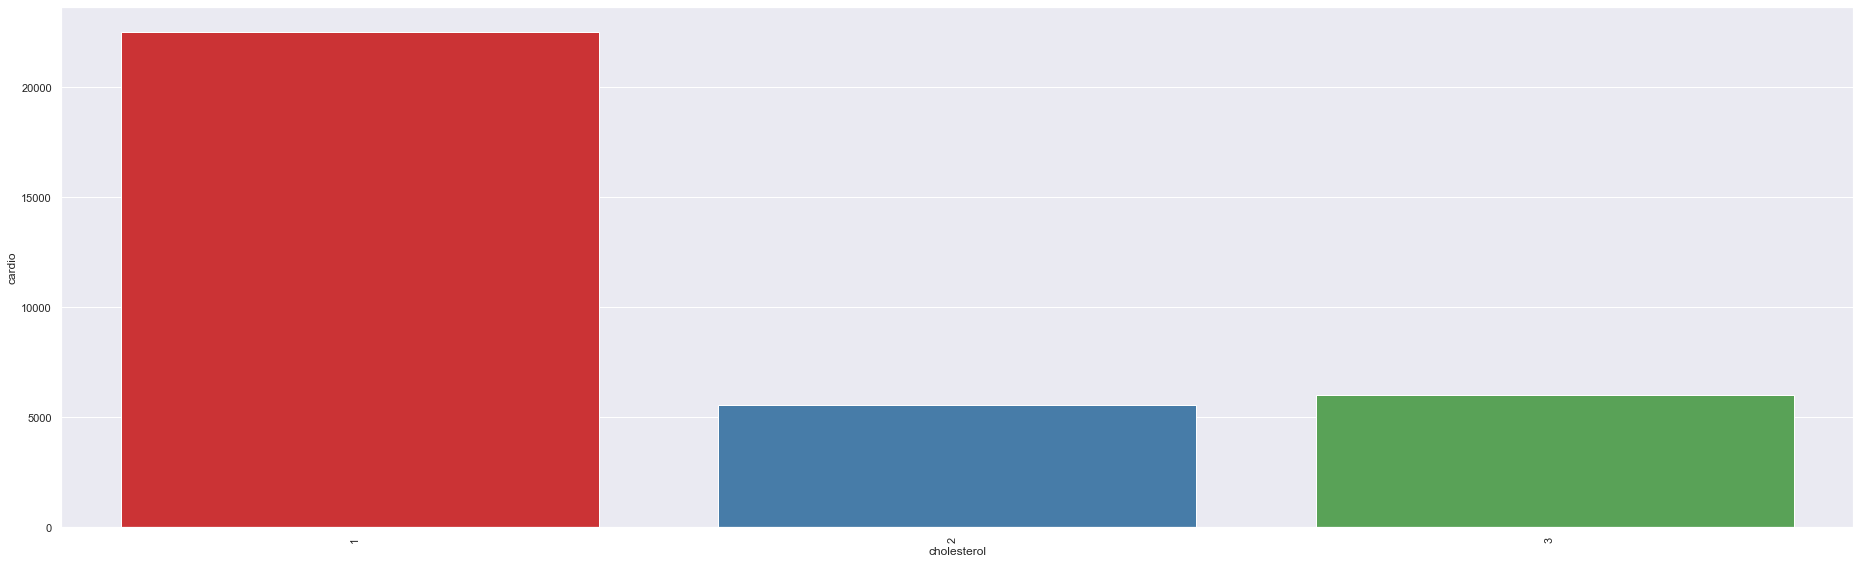

In [41]:
sns.set_theme(style="darkgrid")
ax = sns.barplot(x= "cholesterol" , y="cardio" , data= cholesterol_filter , palette="Set1" );
ax.set_xticklabels(ax.get_xticklabels(), rotation= 90, ha="right")
plt.tight_layout()
plt.show()

# sns.histplot(data=df, x="cholesterol", hue="cardio", multiple="stack" )

In [42]:
cholesterol_filter_one= df.groupby(['cholesterol' , 'cardio'])[['cardio']].sum()
cholesterol_filter_one

cardio
cholesterol cardio        
1           0            0
            1        22547
2           0            0
            1         5572
3           0            0
            1         6027

In [43]:
one_d_cho = cholesterol_filter_one.values.flatten()
one_d_cho

array([    0, 22547,     0,  5572,     0,  6027], dtype=int64)

In [44]:
f_on = one_d_cho[one_d_cho!= 0]
f_on

array([22547,  5572,  6027], dtype=int64)

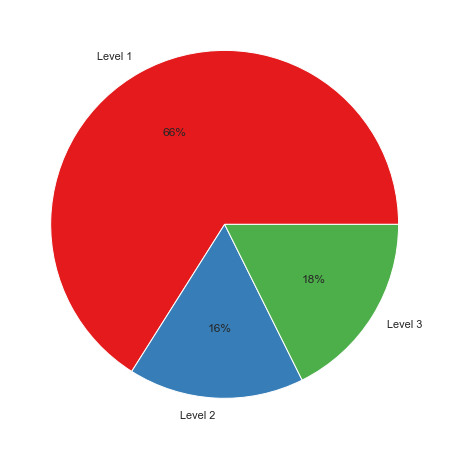

In [45]:
colors = sns.color_palette(palette='Set1')
labels =['Level 1' , 'Level 2' ,'Level 3']
plt.pie(f_on ,labels= labels , autopct='%.0f%%', colors=colors)
plt.show()

### 9- How many alcoholics are Cardiovascular Disease?
<hr style='color: #A9333A'></hr>

In [46]:
alcoholics = df.groupby(['alco' , 'cardio'])[['cardio']].count()
alcoholics

cardio
alco cardio        
0    0        32923
     1        32379
1    0         1931
     1         1767

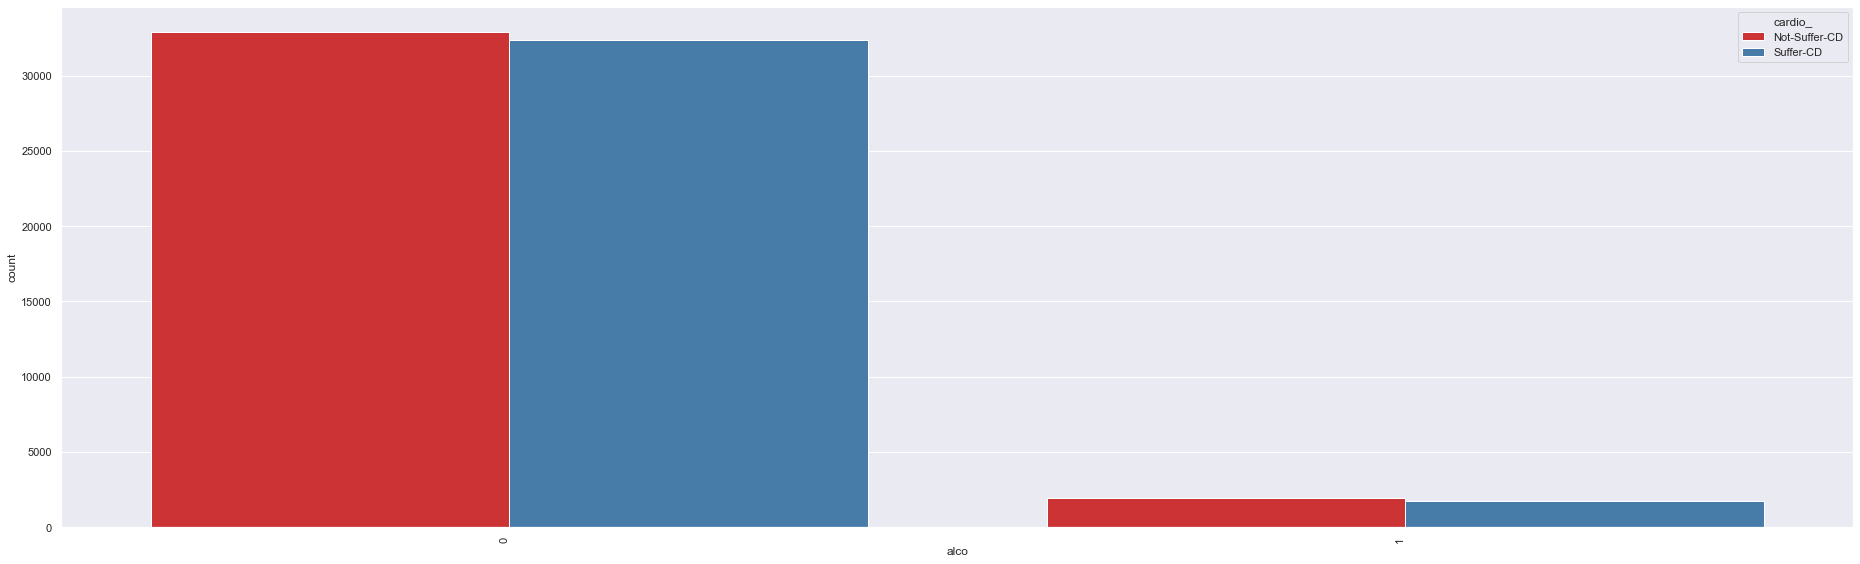

In [47]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x= 'alco' , hue= "cardio_", data= df , palette="Set1" );
ax.set_xticklabels(ax.get_xticklabels(), rotation= 90, ha="right");
plt.tight_layout()
plt.show()

### 10- What is the most BMI that have alot of infection by Cardiovascular Disease?
<hr style='color: #A9333A'></hr>

In [48]:
# Sum the columns that have number 1 
most_BMI = df.groupby(['BMI'], as_index= False)[['cardio']].sum().sort_values(ascending = False , by ='cardio')
most_BMI.reset_index()
most_BMI

,BMI,cardio
599,23.88,505
565,23.44,300
626,24.22,276
745,25.71,214
1169,31.25,184
...,...,...
1440,35.10,0
2012,44.75,0
1880,42.02,0
165,18.11,0


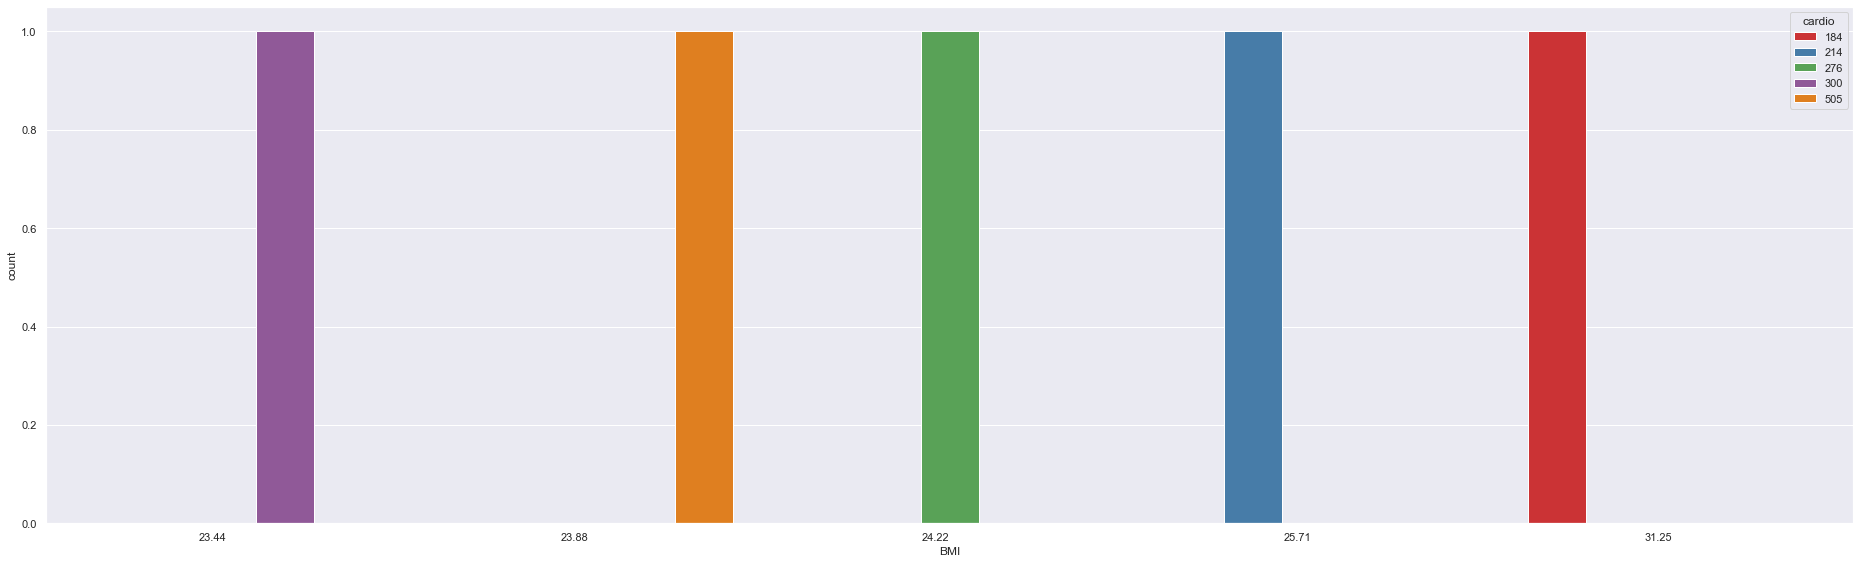

In [49]:
# Draw with seaborn and use the variable that stored the 5 highest ages just
sns.set_theme(style="darkgrid")
ax = sns.countplot(x= "BMI", hue="cardio", data= most_BMI.head(5) , palette="Set1" );
ax.set_xticklabels(ax.get_xticklabels(), ha="right");
plt.tight_layout()
plt.show()

### 11- SB_pressure and DB_pressure relation with cardio?
<hr style='color: #A9333A'></hr>

In [50]:
B_pressure= df.groupby(['SB_pressure' , 'DB_pressure'], as_index= False)[['cardio']].sum().sort_values(ascending = False , by ='cardio')
B_pressure.reset_index()
B_pressure

,SB_pressure,DB_pressure,cardio
345,120,80,8425
617,140,90,4713
482,130,80,2596
492,130,90,2095
731,150,90,1942
...,...,...,...
401,125,67,0
405,125,76,0
409,125,83,0
413,125,87,0


In [51]:
#  Show it in figure
fig = px.bar(B_pressure.head(50), x="SB_pressure", y="DB_pressure", color="cardio",
             title="Systolic & Diastolic blood pressure  blood pressure with cardio")
fig.show()